In [ ]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle

# import calculation libraries
from scipy.integrate import odeint
from scipy import integrate, optimize

# time libraries
import datetime
from datetime import datetime

def SEIR(y, t, beta, gamma1, gamma2, alpha, d1, r):
    #unpackage paraments
    S, E, I, R, total_death= y
    #S, E, I, R = y

    # calculte curve
    dS_dt = -beta*S*I*r/N
    dE_dt = beta*S*I*r/N - gamma1*E - alpha*E
    dI_dt = alpha*E - gamma2*I - d1*I
    dR_dt = gamma1*E + gamma2*I

    # the data we want to find
    total_death = d1*I
    #total_confirmed = alpha*E

    # return result
    return([dS_dt, dE_dt, dI_dt, dR_dt, total_death])
    
def fit_odeint(t,beta,gamma1,gamma2,alpha,d1,r):
    re = integrate.odeint(SEIR,[S0,E0,I0,R0,total_death],t,args=(beta,gamma1,gamma2,alpha,d1,r))
    return re[:,-1]

countries = ['Italy','Japan','China','UK','Spain','Iran','France','Germany']
add_dates = ['4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20','4/24/20','4/25/20','4/26/20','4/27/20','4/28/20','4/29/20','4/30/20','5/1/20']

re = {}
result_data = {}
actual_curve = {}
fitted_curve = {}
prediction_curve = {}

In [ ]:
# load data
confirmed_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
deaths_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
country_pop = pd.read_csv('../input/population-by-country-2020/population_by_country_2020.csv')

country_pop = country_pop.rename(columns={'Country (or dependency)':'Country','Population (2020)':'Population'})
deaths_data = deaths_data.rename(columns={'Province/State':'State','Country/Region':'Country'})
confirmed_data = confirmed_data.rename(columns={'Province/State':'State','Country/Region':'Country'})

In [ ]:
dates = deaths_data.loc[:,'1/22/20':]
dates = list(dates.columns.values)

In [ ]:
import pickle
with open('../data/deaths_prediction','rb') as f:
    prediction = pickle.load(f)

In [ ]:
prediction['prediction_curve'].keys()

In [231]:
country = 'China'
filepath = '../data/'+country+'_prediction'
with open(filepath,'rb') as f:
    prediction = pickle.load(f)

In [232]:
if country != 'US':
    actual_data = prediction[country][0][1]
    fitted_data = prediction[country][1][1]
    prediction_data = prediction[country][2][1]
else:
    actual_data = prediction[0][1]
    fitted_data = prediction[1][1]
    prediction_data = prediction[2][1]

In [237]:
len(fitted_data)

74

In [238]:
actual_curve[country] = {}
fitted_curve[country] = {}
prediction_curve[country] ={}

actual_curve = pd.Series(actual_data, dates)
fitted_curve = pd.Series(prediction_data[:84], dates)
prediction_curve = pd.Series(prediction_data, dates+add_dates)

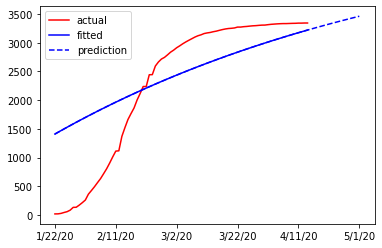

In [239]:
fig,(ax1) = plt.subplots(1, 1)

actual_curve.plot(ax=ax1,label = 'actual',color = 'r')
fitted_curve.plot(ax=ax1,label = 'fitted',color = 'b')
prediction_curve.plot(ax=ax1,label = 'prediction',color = 'b',ls='--')

plt.legend()
plt.show()

In [181]:
actual_curve[-1]

143

In [179]:
result_data[country]={'actual_curve':actual_curve,
                      'fitted_curve':fitted_curve,
                      'prediction_curve':prediction_curve}

In [180]:
result_data.keys()

dict_keys(['Spain', 'UK', 'Iran', 'Germany', 'France', 'China', 'Italy', 'US', 'Japan'])

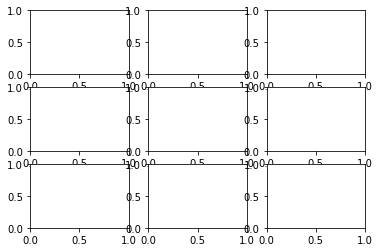

In [182]:
fig,axs = plt.subplots(3, 3)

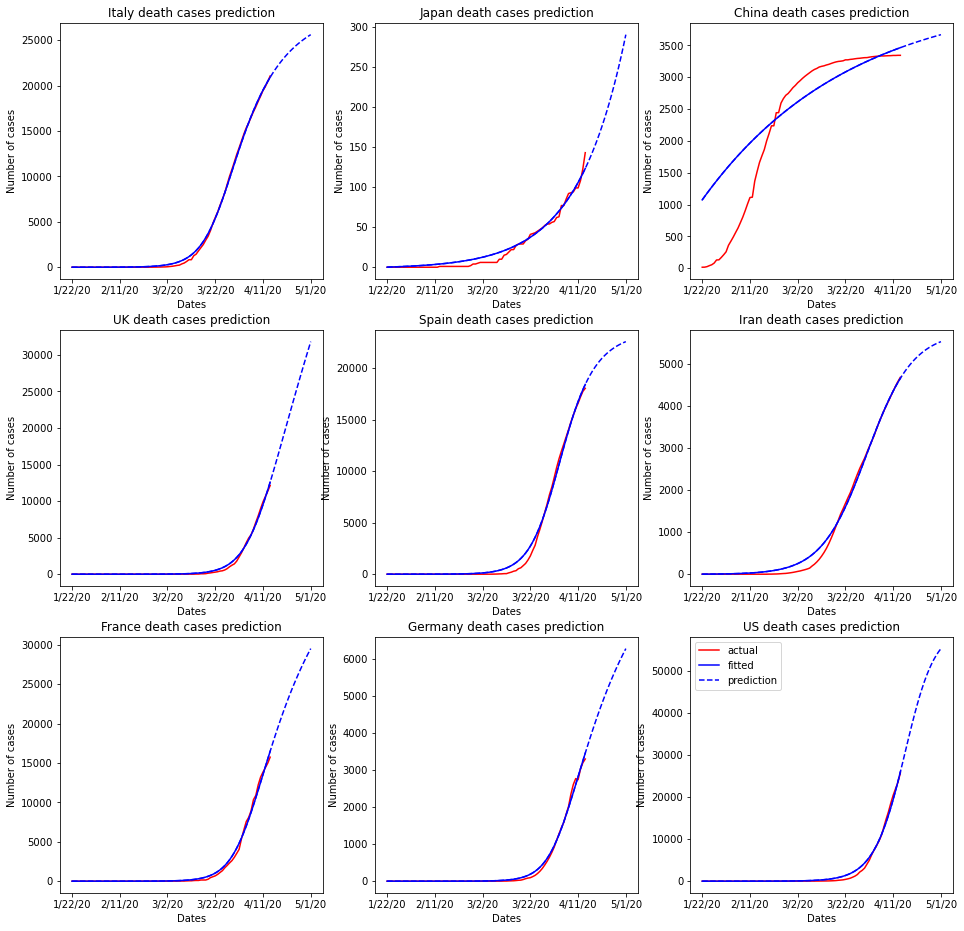

In [246]:
countries = ['Italy','Japan','China','UK','Spain','Iran','France','Germany','US']
fig,axs = plt.subplots(3, 3,figsize = (16,16))
for index,country in enumerate(countries):
    # get loc
    i = int(index / 3)
    j = int(index % 3)
    ax = axs[i][j]

    # load curve
    actual_curve = pd.Series(result_data[country]['actual_curve'])   
    fitted_curve = pd.Series(result_data[country]['fitted_curve'])
    prediction_curve = pd.Series(result_data[country]['prediction_curve'])

    # plot
    actual_curve.plot(ax=ax,label ='actual',color = 'r')
    fitted_curve.plot(ax=ax,label ='fitted',color = 'b')
    prediction_curve.plot(ax=ax,label ='prediction',color = 'b',ls='--')
    ax.set_title(country+' death cases prediction')
    ax.set_ylabel("Number of cases")
    ax.set_xlabel("Dates")

#fig.suptitle('Death cases prediction')
plt.legend()
plt.savefig("../graphs/Death cases prediction")
plt.show()

In [217]:
result_data['Spain']['prediction_curve']

1/22/20            0
1/23/20    0.0456808
1/24/20    0.0945963
1/25/20     0.148403
1/26/20     0.208798
             ...    
4/28/20      22259.6
4/29/20      22380.5
4/30/20      22489.8
5/1/20       22588.7
UK                {}
Length: 102, dtype: object

In [218]:
result_data['Spain']['actual_curve'].pop('UK')
result_data['Spain']['fitted_curve'].pop('UK')
result_data['Spain']['prediction_curve'].pop('UK')

{}

In [219]:
with open('../data/deaths_prediction','wb') as f:
    pickle.dump(result_data,f)